# Stock Price Prediction Using Machine Learning

**Author:** Swapnanil Mandal

## Introduction

This project aims to predict the future stock prices of a selected company using historical stock price data and machine learning models. We will explore various techniques such as Linear Regression and Long Short-Term Memory (LSTM) networks to achieve this goal. The main concepts involved include moving averages, return calculations, and model performance metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

## Data Collection

We will use the Yahoo Finance API to download historical stock price data for our analysis.


#### Import Libraries

In [214]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [215]:
# User inputs
company_name = input("Enter the ticker symbol or name of the company: ")
start_date = input("Enter the start date (YYYY-MM-DD) for historical data: ")
end_date = input("Enter the end date (YYYY-MM-DD) for historical data: ")

Enter the ticker symbol or name of the company:  NVDA
Enter the start date (YYYY-MM-DD) for historical data:  2020-01-01
Enter the end date (YYYY-MM-DD) for historical data:  2023-01-01


In [216]:
# Download historical data
data = yf.download(company_name, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [217]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973633,237536000
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.878019,205384000
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902669,262636000
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.974131,314856000
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.985336,277108000


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       756 non-null    float64
 1   High       756 non-null    float64
 2   Low        756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [219]:
data.shape

(756, 6)

In [220]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Preprocessing

In [221]:
# Handle missing values
data.ffill(inplace=True)

In [222]:
# Normalize the 'Close' price data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close_scaled'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [223]:
# Create new features: Moving Averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

In [224]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Close_scaled,MA20,MA50
Date,,,,,,,,,
2022-12-23,15.196,15.339,14.883,15.206,15.197294,349326000,0.361695,16.57380,15.11456
2022-12-27,15.074,15.100,14.056,14.121,14.112915,464902000,0.323579,16.48850,15.17244
2022-12-28,13.927,14.262,13.884,14.036,14.027966,351066000,0.320593,16.40835,15.21540
2022-12-29,14.402,14.683,14.227,14.603,14.594640,354923000,0.340511,16.29235,15.26812
2022-12-30,14.334,14.629,14.233,14.614,14.605634,310490000,0.340898,16.16630,15.31938


## Exploratory Data Analysis (EDA)


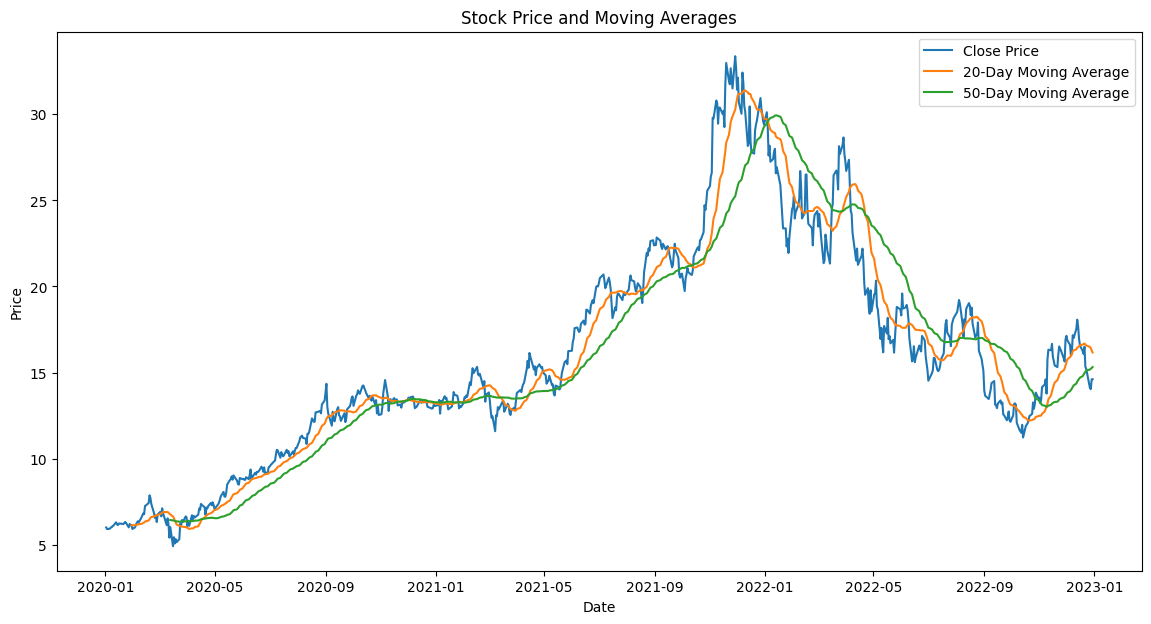

In [225]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA20'], label='20-Day Moving Average')
plt.plot(data['MA50'], label='50-Day Moving Average')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Feature Engineering


In [226]:
# Drop NaN values and create returns feature
data.dropna(inplace=True)
data['Returns'] = data['Close'].pct_change()
data['Volume_scaled'] = scaler.fit_transform(data['Volume'].values.reshape(-1, 1))

In [227]:
# Select relevant features
features = data[['Close_scaled', 'MA20', 'MA50', 'Returns', 'Volume_scaled']].dropna()

In [228]:
features.head()

,Close_scaled,MA20,MA50,Returns,Volume_scaled
Date,,,,,
2020-03-16,0.000000,6.640487,6.410790,-0.184521,0.460600
2020-03-17,0.018329,6.541362,6.401390,0.106263,0.538694
2020-03-18,0.005638,6.401512,6.384270,-0.066507,0.568446
2020-03-19,0.014552,6.281850,6.370790,0.050044,0.488818
2020-03-20,0.008212,6.171450,6.353475,-0.033901,0.517464


In [229]:
features.shape

(706, 5)

In [230]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 2020-03-16 to 2022-12-30
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close_scaled   706 non-null    float64
 1   MA20           706 non-null    float64
 2   MA50           706 non-null    float64
 3   Returns        706 non-null    float64
 4   Volume_scaled  706 non-null    float64
dtypes: float64(5)
memory usage: 33.1 KB


In [231]:
features.isna().sum()

Close_scaled     0
MA20             0
MA50             0
Returns          0
Volume_scaled    0
dtype: int64

## Model Building


### Linear Regression

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [233]:
# Linear Regression Model
X = features[['MA20', 'MA50', 'Returns']]
y = features['Close_scaled']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [235]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [236]:
# Predict the stock prices
predictions_lr = model_lr.predict(X_test)
predictions_lr = scaler.inverse_transform(predictions_lr.reshape(-1, 1))

### LSTM Model

In [237]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [238]:
# Create the dataset for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [239]:
time_step = 100
X_lstm, y_lstm = create_dataset(features['Close_scaled'].values.reshape(-1, 1), time_step)

In [240]:
# Split the data
X_train_lstm, X_test_lstm = X_lstm[:int(0.8*len(X_lstm))], X_lstm[int(0.8*len(X_lstm)):]
y_train_lstm, y_test_lstm = y_lstm[:int(0.8*len(y_lstm))], y_lstm[int(0.8*len(y_lstm)):]

In [241]:
# Reshape data for LSTM
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

In [242]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, 1)))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(25))
model_lstm.add(Dense(1))

In [255]:
# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [256]:
# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1)

484/484 ━━━━━━━━━━━━━━━━━━━━ 33s 52ms/step - loss: 0.0042


In [257]:
# Predict the stock prices
predictions_lstm = model_lstm.predict(X_test_lstm)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


## Model Evaluation

In [258]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [259]:
# Linear Regression Evaluation
y_test_actual = scaler.inverse_transform(y_test.values.reshape(-1, 1))
mae_lr = mean_absolute_error(y_test_actual, predictions_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test_actual, predictions_lr))

In [260]:
# LSTM Evaluation
y_test_lstm_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))
mae_lstm = mean_absolute_error(y_test_lstm_actual, predictions_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_actual, predictions_lstm))

In [261]:
print(f'Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}')
print(f'LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}')

Linear Regression - MAE: 48351673.110925026, RMSE: 60821947.292453
LSTM - MAE: 31979581.597490437, RMSE: 38341134.29974209


## Visualization

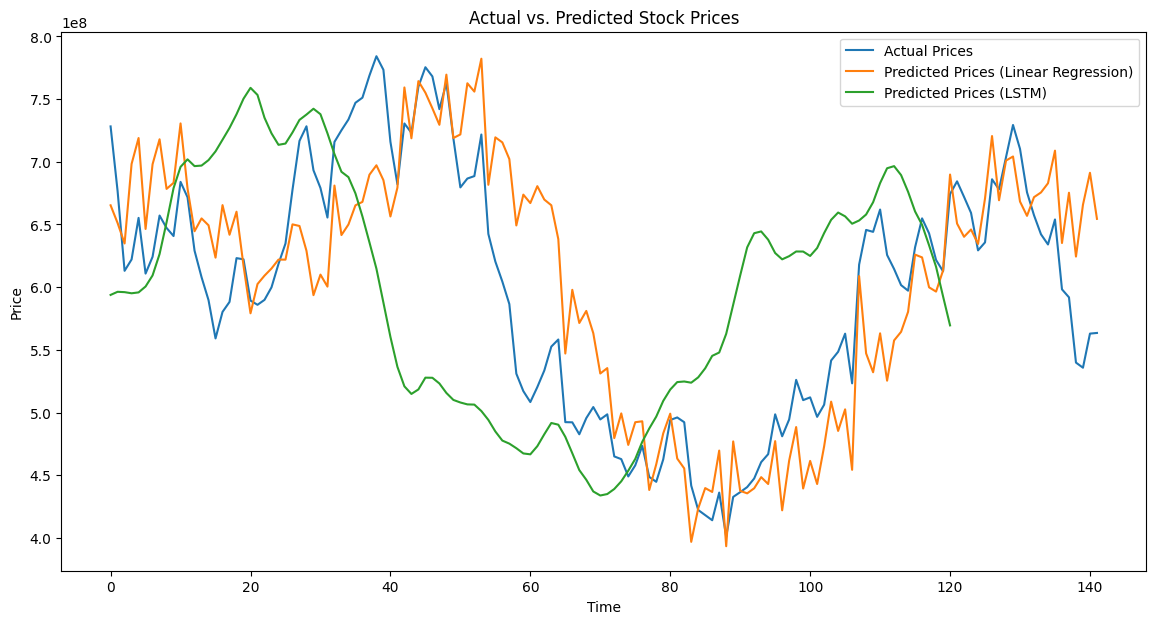

In [262]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(predictions_lr, label='Predicted Prices (Linear Regression)')
plt.plot(predictions_lstm, label='Predicted Prices (LSTM)')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Summary

In [263]:
# Calculate and print key performance metrics
max_actual_price = np.max(y_test_actual)
min_actual_price = np.min(y_test_actual)
avg_actual_price = np.mean(y_test_actual)
max_predicted_lr = np.max(predictions_lr)
min_predicted_lr = np.min(predictions_lr)
avg_predicted_lr = np.mean(predictions_lr)
max_predicted_lstm = np.max(predictions_lstm)
min_predicted_lstm = np.min(predictions_lstm)
avg_predicted_lstm = np.mean(predictions_lstm)

In [264]:
# Dashboard summary
print("\nDashboard Summary:")
print("------------------")
print(f"Company: {company_name}")
print(f"Date Range: {start_date} to {end_date}")

print(f"\nKey Performance Metrics:")
print(f"------------------------")
print(f"Max Actual Price: {max_actual_price:.2f}")
print(f"Min Actual Price: {min_actual_price:.2f}")
print(f"Avg Actual Price: {avg_actual_price:.2f}")
print(f"Max Predicted Price (Linear Regression): {max_predicted_lr:.2f}")
print(f"Min Predicted Price (Linear Regression): {min_predicted_lr:.2f}")
print(f"Avg Predicted Price (Linear Regression): {avg_predicted_lr:.2f}")
print(f"Max Predicted Price (LSTM): {max_predicted_lstm:.2f}")
print(f"Min Predicted Price (LSTM): {min_predicted_lstm:.2f}")
print(f"Avg Predicted Price (LSTM): {avg_predicted_lstm:.2f}")


Dashboard Summary:
------------------
Company: NVDA
Date Range: 2020-01-01 to 2023-01-01

Key Performance Metrics:
------------------------
Max Actual Price: 784238587.55
Min Actual Price: 400973975.82
Avg Actual Price: 598916323.72
Max Predicted Price (Linear Regression): 782252931.00
Min Predicted Price (Linear Regression): 393346887.11
Avg Predicted Price (Linear Regression): 607019723.70
Max Predicted Price (LSTM): 759018752.00
Min Predicted Price (LSTM): 433810048.00
Avg Predicted Price (LSTM): 596377408.00


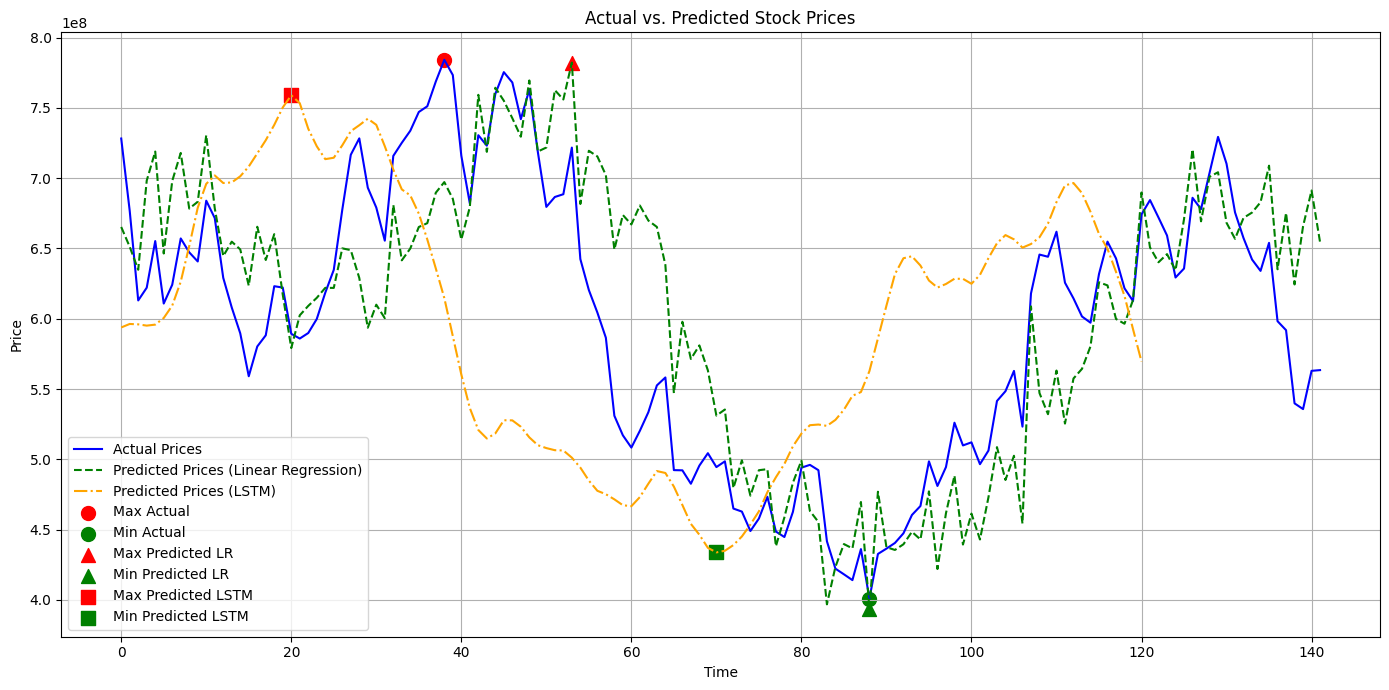

In [265]:
# Plotting actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Prices', color='blue', linestyle='-')
plt.plot(predictions_lr, label='Predicted Prices (Linear Regression)', color='green', linestyle='--')
plt.plot(predictions_lstm, label='Predicted Prices (LSTM)', color='orange', linestyle='-.')
plt.scatter(np.argmax(y_test_actual), max_actual_price, color='red', marker='o', label='Max Actual', s=100)
plt.scatter(np.argmin(y_test_actual), min_actual_price, color='green', marker='o', label='Min Actual', s=100)
plt.scatter(np.argmax(predictions_lr), max_predicted_lr, color='red', marker='^', label='Max Predicted LR', s=100)
plt.scatter(np.argmin(predictions_lr), min_predicted_lr, color='green', marker='^', label='Min Predicted LR', s=100)
plt.scatter(np.argmax(predictions_lstm), max_predicted_lstm, color='red', marker='s', label='Max Predicted LSTM', s=100)
plt.scatter(np.argmin(predictions_lstm), min_predicted_lstm, color='green', marker='s', label='Min Predicted LSTM', s=100)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### References

- Yahoo Finance API: https://pypi.org/project/yfinance/
- Scikit-learn: https://scikit-learn.org/
- TensorFlow: https://www.tensorflow.org/
